# Name : Vishal Soni
# Lets Grow More
# Iris Flower Classification

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets,model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

In [3]:
plt.rcParams['figure.figsize']=(15,9)

In [4]:
data = datasets.load_iris()

In [5]:
x = data['data']
y = data['target']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


Division of Data into Training And Testing Sets

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, train_size=0.8,random_state=15)

# Plotting of Training Data

In [7]:
labels={0: "Iris-Setosa",1:'Iris-Veriscolour',2:'Iris-Virginica'}
label_colours = ['blue','orange','green']

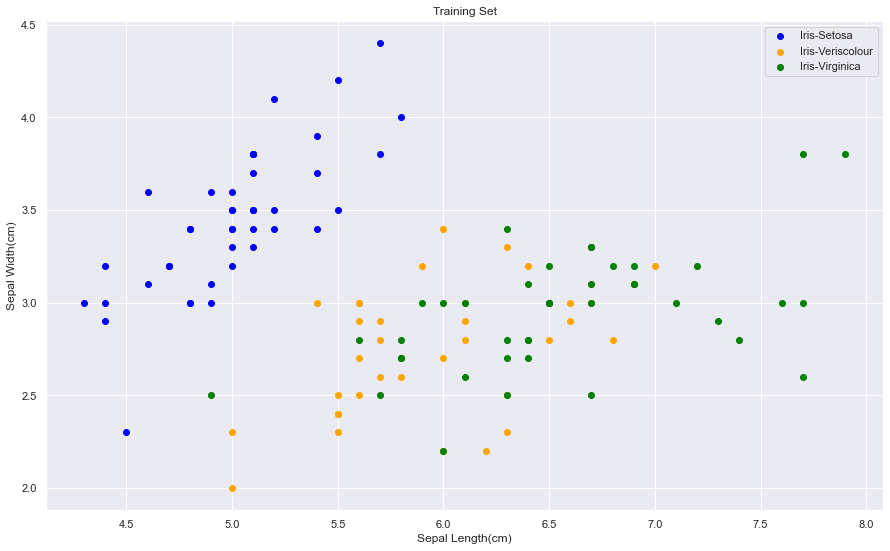

In [9]:
def plot_iris(x,y,labels,colours,a=0,b=1,title='Training Set'):
    for c in np.unique(y):
        inx = np.where(y == c)
        plt.scatter(x[inx,a], x[inx,b], label=labels[c],c=colours[c])
        plt.title(title)
        plt.xlabel("Sepal Length(cm)")
        plt.ylabel("Sepal Width(cm)")
        plt.legend()

plt.figure(figsize=(15,9))
plot_iris(x_train, y_train, labels, label_colours)
plt.show()

# TRAINING OF FULL DATASET

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
tf.keras.backend.clear_session()
mlp = Sequential([
                  Dense(3,input_shape=(4,),activation='softmax')])
mlp.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [13]:
history =mlp.fit(x_train,y_train,validation_split=0.1,batch_size=16, epochs=100, verbose=0)

In [14]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.115984,0.972222,0.202519,0.833333
1,0.115854,0.972222,0.202740,0.833333
2,0.115739,0.972222,0.202621,0.833333
3,0.115626,0.972222,0.202329,0.833333
4,0.115499,0.972222,0.202059,0.833333


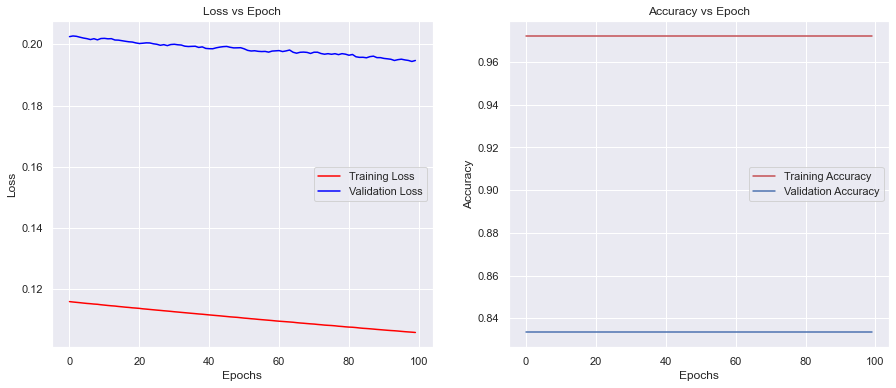

In [16]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

plt.show()

In [19]:
mlp.evaluate(x_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.1147 - accuracy: 0.9583


[0.1147160455584526, 0.9583333134651184]

In [21]:
print(f'Test Accuracy : (mlp.evaluate(x_test,y_test)[1]:  .2%)')

Test Accuracy : (mlp.evaluate(x_test,y_test)[1]:  .2%)


# DATASET(SEPAL)

In [22]:
x_train, x_test, y_train,y_test = model_selection.train_test_split(x[:, :2],y,train_size=0.8,random_state=15)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train.shape

(120, 2)

# ARTIFICIAL NEURAL NETWORK(ANN)

In [24]:
tf.keras.backend.clear_session()
classifier = Sequential([
                         Dense(5,input_shape=(2,),activation='relu'),
                         Dense(3,activation='softmax')
])
classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classifier.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = classifier.fit(x_train,y_train,validation_split=0.1,batch_size=16,epochs=1000,verbose=0)
df= pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.379319,0.796296,0.379628,0.750000
996,0.379339,0.796296,0.378077,0.833333
997,0.379335,0.796296,0.379165,0.833333
998,0.379151,0.796296,0.377984,0.833333
999,0.379173,0.796296,0.377176,0.833333


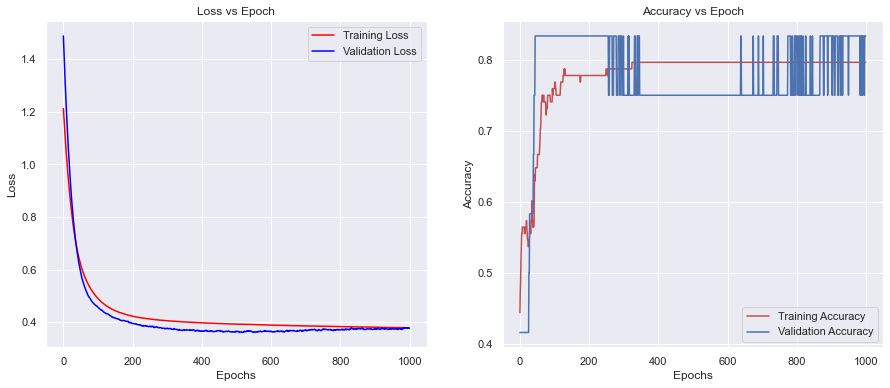

In [27]:
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

plt.show()


In [28]:
print(f'Test Accuracy : (classifier.evaluate(x_test,y_test)[1]:  .2%)')

Test Accuracy : (classifier.evaluate(x_test,y_test)[1]:  .2%)


# EVALUATE USING CONFUSION MATRIX

<AxesSubplot:>

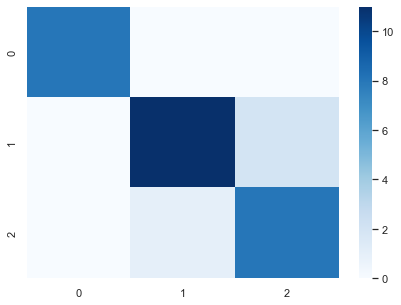

In [29]:
y_pred = np.argmax(classifier.predict(x_test),axis=1)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap="Blues")

In [34]:
def get_mesh(x0_range,x1_range,num_points=100):
    x0 = np.linspace(x0_range[0],x0_range[1],num_points)
    x1 = np.linspace(x1_range[0],x1_range[1],num_points)
    return np.mesh(x0,x1)

# VISUALIZATION

NameError: name 'plot_data' is not defined

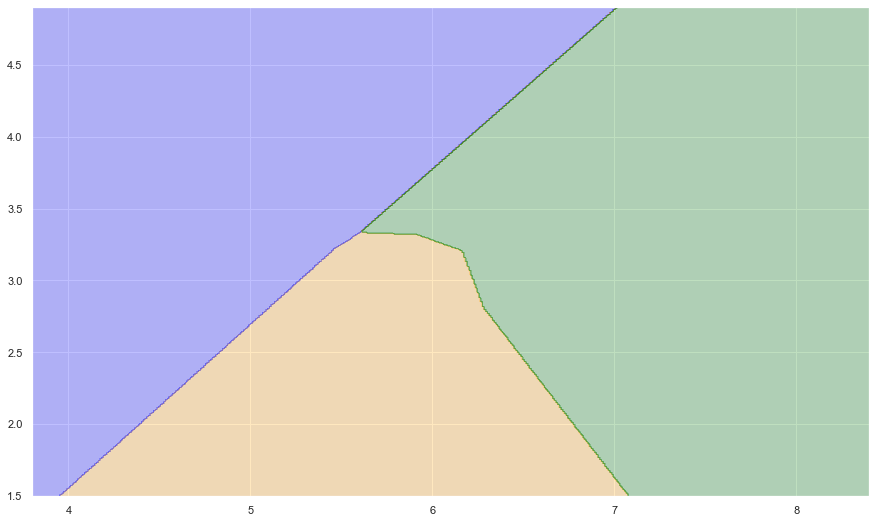

In [35]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[:,0].min() - 0.5,x[:,0].max() +0.5],
                             [x[:,1].min()-0.5,x[:,1].max()+0.5],num_points=num_points)
y_pred = np.argmax(classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)),axis=1).reshape(num_points,num_points)

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)

plot_data(x,y,labels,label_colours,title='Decision Boundaries(Multilayer Perception)')
plt.show()


# LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [37]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 2, 1])

# EVALUATION USING CONFUSION MATRIX

Test Accuracy:  90.00%


<AxesSubplot:>

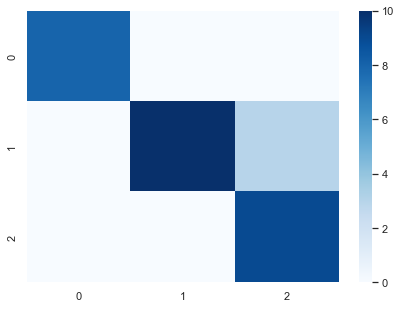

In [39]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal/len(y_test)
print(f'Test Accuracy: {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap = 'Blues')

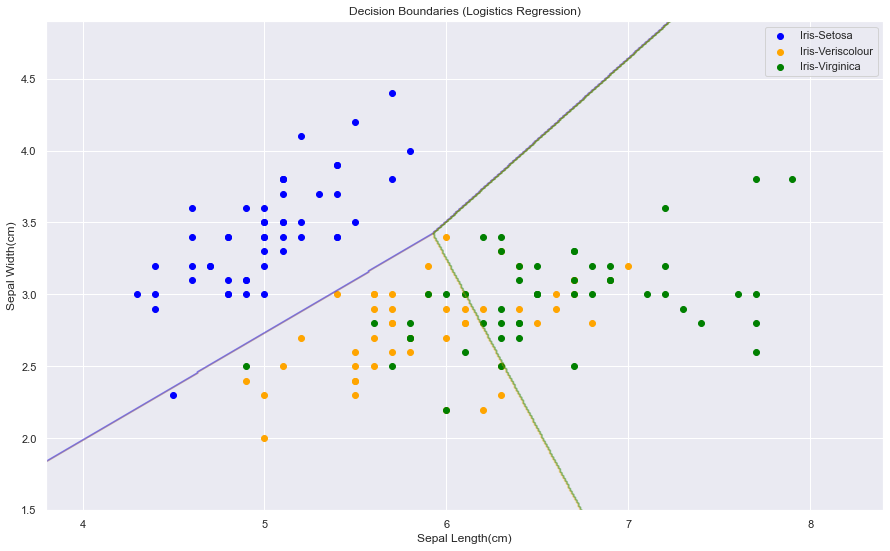

In [41]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_iris(x,y,labels,label_colours,title='Decision Boundaries (Logistics Regression)')
plt.show()

# NAIVE BAYES

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [43]:
y_pred = classifier.predict(x_test)

Test Accuracy :  90.00%


<AxesSubplot:>

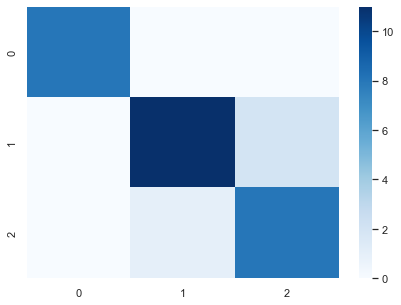

In [44]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy= diagonal/len(y_test)
print(f'Test Accuracy : {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

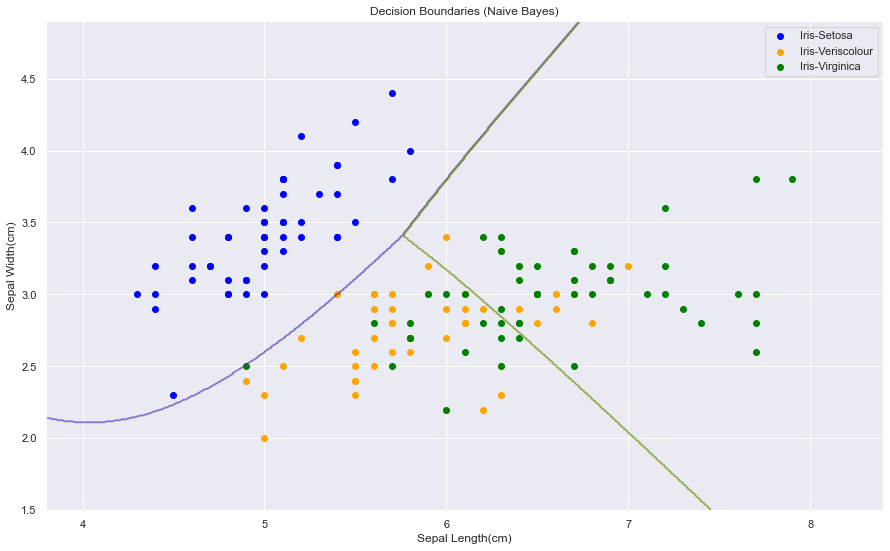

In [46]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_iris(x,y,labels,label_colours,title='Decision Boundaries (Naive Bayes)')
plt.show()

# RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [48]:
y_pred = classifier.predict(x_test)

Test Accuracy:  76.67%


<AxesSubplot:>

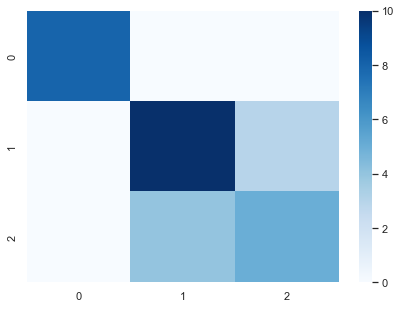

In [49]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal/len(y_test)
print(f'Test Accuracy: {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap = 'Blues')

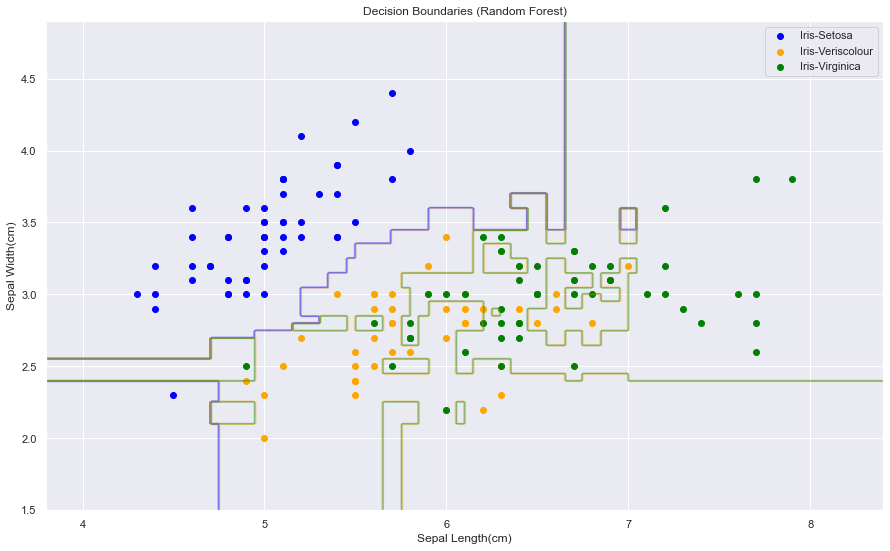

In [50]:
num_points = 400
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_iris(x,y,labels,label_colours,title='Decision Boundaries (Random Forest)')
plt.show()